In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [145]:
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  1.5.3
seaborn version :  0.12.2


In [146]:
df = pd.read_csv('Travel.csv')

In [147]:
df.shape

(4888, 20)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [149]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [150]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('--------------------------------')

CustomerID
[200000 200001 200002 ... 204885 204886 204887]
--------------------------------
ProdTaken
[1 0]
--------------------------------
Age
[41. 49. 37. 33. nan 32. 59. 30. 38. 36. 35. 31. 34. 28. 29. 22. 53. 21.
 42. 44. 46. 39. 24. 43. 50. 27. 26. 48. 55. 45. 56. 23. 51. 40. 54. 58.
 20. 25. 19. 57. 52. 47. 18. 60. 61.]
--------------------------------
TypeofContact
['Self Enquiry' 'Company Invited' nan]
--------------------------------
CityTier
[3 1 2]
--------------------------------
DurationOfPitch
[  6.  14.   8.   9.  30.  29.  33.  22.  21.  32.  25.  27.  11.  17.
  15.  13.  12.  16.  10.  31.  18.  nan  24.  35.  28.  20.  26.  34.
  23.   5.  19. 126.   7.  36. 127.]
--------------------------------
Occupation
['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
--------------------------------
Gender
['Female' 'Male' 'Fe Male']
--------------------------------
NumberOfPersonVisiting
[3 2 1 4 5]
--------------------------------
NumberOfFollowups
[ 3.  4.  2.  5

# Data Pre-Processing

In [151]:
# Membuang colom yang tidak digunakan
df_prep = df.copy()
df_prep = df_prep.drop(columns='CustomerID')

## Handling Missing Values

In [152]:
df_prep.dropna(inplace=True)

In [153]:
# df_prep['Age'].fillna(df_prep['Age'].mean(), inplace=True)
# df_prep['TypeofContact'].fillna('Unknown', inplace=True)
# df_prep['DurationOfPitch'].fillna(df_prep['DurationOfPitch'].median(), inplace=True)
# df_prep['NumberOfFollowups'].fillna(0, inplace=True)
# df_prep['PreferredPropertyStar'].fillna(3, inplace=True)
# df_prep['NumberOfTrips'].fillna(df_prep['NumberOfTrips'].median(), inplace=True)
# df_prep['NumberOfChildrenVisiting'].fillna(0, inplace=True)
# df_prep['MonthlyIncome'].fillna(df_prep['MonthlyIncome'].median(), inplace=True)

In [154]:
df_prep.isna().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [155]:
df_prep.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4128.0,0.193072,0.394757,0.0,0.0,0.0,0.0,1.0
Age,4128.0,37.231831,9.174521,18.0,31.0,36.0,43.0,61.0
CityTier,4128.0,1.663275,0.920640,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4128.0,15.584787,8.398142,5.0,9.0,14.0,20.0,127.0
NumberOfPersonVisiting,4128.0,2.949370,0.718818,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4128.0,3.741521,1.006786,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4128.0,3.578488,0.795031,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4128.0,3.295300,1.856300,1.0,2.0,3.0,4.0,22.0
Passport,4128.0,0.295300,0.456233,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4128.0,3.060804,1.363064,1.0,2.0,3.0,4.0,5.0


## Handling Duplicates values

In [156]:
print('There is',df_prep.duplicated().sum(),'duplicated value')

There is 117 duplicated value


In [157]:
df_prep = df_prep.drop_duplicates()

In [158]:
print('There is',df_prep.duplicated().sum(),'duplicated value')

There is 0 duplicated value


## Handling Inconsistent Categorical Values

In [159]:
pd.set_option('display.max_rows', 5000)
for i in df.columns:
    if i not in 'CustomerID':
        print(f'''Value count kolom {i}:''')
        print(df[i].value_counts())
        print()
    

Value count kolom ProdTaken:
0    3968
1     920
Name: ProdTaken, dtype: int64

Value count kolom Age:
35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
57.0     29
60.0     29
18.0     14
61.0      9
Name: Age, dtype: int64

Value count kolom TypeofContact:
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

Value count kolom CityTier:
1    3190
3    1500
2     198
Name: CityTier, dtype: int64

Value count kolom DurationOfPitch:
9.0      483
7.0      342
8.0      333
6.0      307
16.0     274
15.0     269
14.0     253
10.0     244
1

Diketahui bahwa ada ketidakkonsistenan pada feature gerder(Fe Male), dan maritalstatus(Singe dengan unmaried yang memiliki definisi sama)

In [160]:
df_prep['Gender'] = df_prep['Gender'].replace('Fe Male', 'Female')
df_prep['MaritalStatus'] = df_prep['MaritalStatus'].replace('Single', 'Unmarried')

In [161]:
handled = ['Gender', 'MaritalStatus']
for i in handled:
    print(f'''Value count kolom {i}:''')
    print(df_prep[i].value_counts())
    print()

Value count kolom Gender:
Male      2394
Female    1617
Name: Gender, dtype: int64

Value count kolom MaritalStatus:
Married      1941
Unmarried    1281
Divorced      789
Name: MaritalStatus, dtype: int64



In [162]:
# remove rows with Occupation is `Free Lancer`
df_prep = df_prep[df_prep['Occupation']!='Free Lancer']

### Handling outliers

In [163]:
# view total rows before filtered
print(f'Jumlah baris sebelum memfilter outlier adalah {df_prep.shape[0]}')

# handle outlier using z-score
filtered_entries = np.array([True] * len(df_prep))
skewed_cols = ['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
for col in skewed_cols:
    zscore = abs(stats.zscore(df_prep[col]))
    filtered_entries = (zscore < 3) & filtered_entries    

# view total rows after filtered
df_prep = df_prep[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier adalah {df_prep.shape[0]}')

Jumlah baris sebelum memfilter outlier adalah 4009
Jumlah baris setelah memfilter outlier adalah 3993


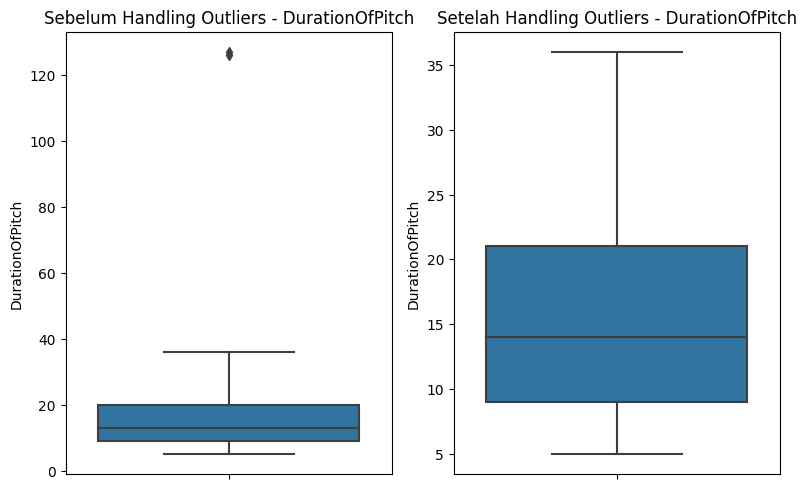

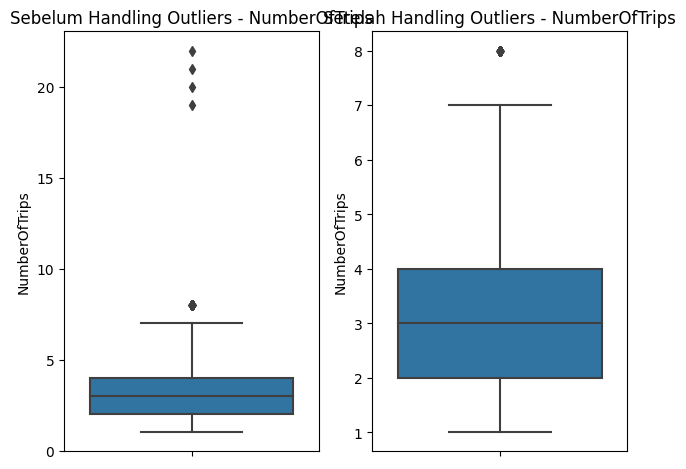

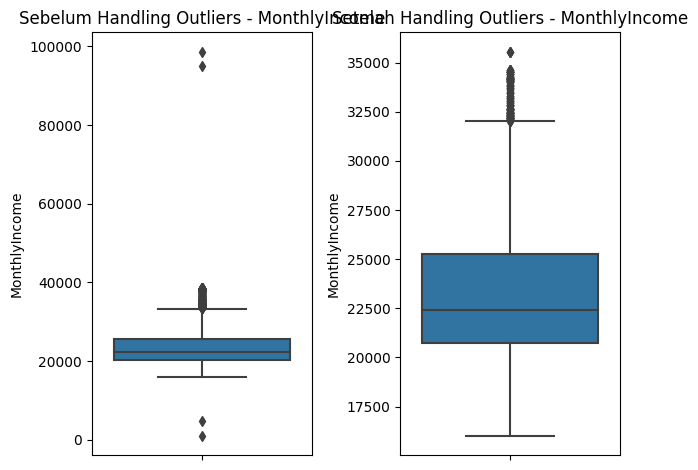

In [164]:
df_prep_before  = df.copy()

plt.figure(figsize=(8, 5))
for col in skewed_cols:
    # Boxplot sebelum penanganan outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df_prep_before[col])
    plt.title(f'Sebelum Handling Outliers - {col}')

    # Boxplot setelah penanganan outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_prep[col])
    plt.title(f'Setelah Handling Outliers - {col}')

    plt.tight_layout()
    plt.show()

## Feature Engineering

## Feature Selection

Diketahui dari percobaan code diatas bahwa semua feature dapat digunakan dikarenakan tidak ada yang redundant jika menggunakan threshold 0.7

In [165]:
nums = df_prep.select_dtypes(exclude=object).columns.tolist()
cats = df_prep.select_dtypes(include=object).columns.tolist()

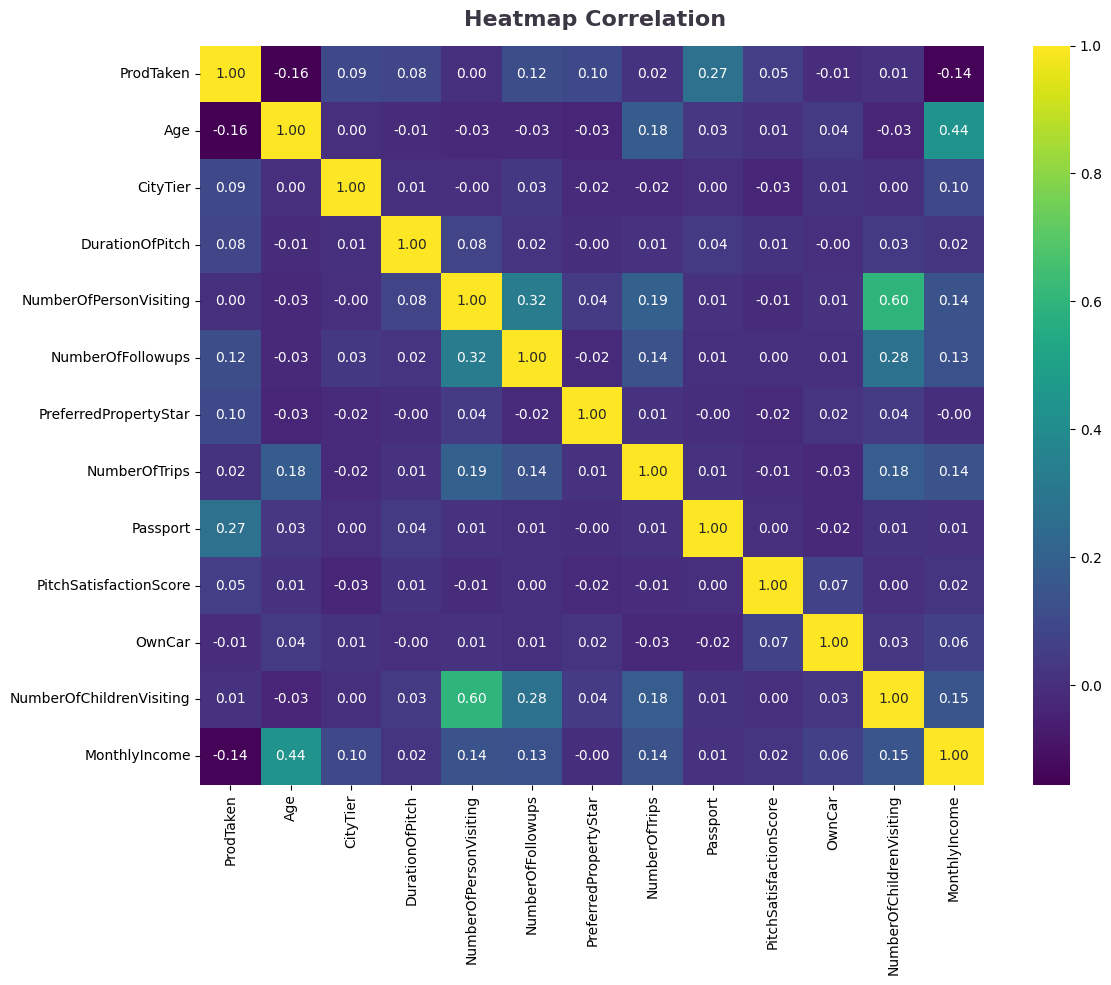

In [166]:
plt.figure(figsize=(12,10))
sns.heatmap(df_prep.corr(), annot=True, fmt='.2f', cmap='viridis')
plt.suptitle('Heatmap Correlation', color='#3C3744', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()

In [167]:
# get correlation > +- 0.5
df_corr = df_prep[nums].corr().iloc[1:,1:]
df_corr = df_corr.apply(lambda x: round(x, 3))
dfcorr = []
for idx in df_corr.index:
    for col in df_corr.columns:
        dfcorr.append([idx, col])
        if (np.abs(df_corr.loc[idx, col]) > 0.5) and (idx != col) and [col, idx] not in dfcorr:
            print(f'{idx} with {col} has correlation : {df_corr.loc[idx, col]}')

NumberOfPersonVisiting with NumberOfChildrenVisiting has correlation : 0.597


In [168]:
df_prep.duplicated().sum()

0

In [169]:
df_prep.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Unmarried,1.0,0,5,1,1.0,Executive,18068.0
6,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0


In [170]:
df_prep.drop(columns=['NumberOfChildrenVisiting'], axis=1, inplace=True)

In [171]:
df_prep = df_prep.drop_duplicates()
df_prep.duplicated().sum()

0

In [172]:
df_clean = df_prep.copy()

### Feature Extraction

Melakukan segmentasi pada feature Age dan Income

### Feature Encoding

In [28]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
# # label encoding
df_prep['ProductPitched'] = df_prep['ProductPitched'].map({'Basic':0, 'Standard':1, 'Deluxe':2,
                                                           'Super Deluxe':3, 'King':4})
df_prep['Designation'] = df_prep['Designation'].map({'Manager':0, 'Senior Manager':1, 'Executive':2,
                                                     'AVP':3, 'VP':4})



In [30]:
df_prep['CityTier'].unique()

array([3, 1, 2], dtype=int64)

In [31]:
encoder = OneHotEncoder(sparse=False)
for col in ['TypeofContact', 'Occupation', 'MaritalStatus', 'Gender', 'PreferredPropertyStar', 'CityTier']:
    onehots = pd.get_dummies(df_prep[col], prefix=col)
    df_prep = pd.concat([df_prep, onehots], axis=1)
    df_prep.drop(columns=col, axis=1, inplace=True)

In [32]:
df_prep.shape

(3852, 28)

In [33]:
df_prep.columns

Index(['ProdTaken', 'Age', 'DurationOfPitch', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation', 'MonthlyIncome',
       'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Unmarried', 'Gender_Female',
       'Gender_Male', 'PreferredPropertyStar_3.0', 'PreferredPropertyStar_4.0',
       'PreferredPropertyStar_5.0', 'CityTier_1', 'CityTier_2', 'CityTier_3'],
      dtype='object')

### Feature Transformation

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaling using normalization
df_prep['Age'] = MinMaxScaler().fit_transform(df_prep['Age'].values.reshape(-1, 1))
# scaling using standardization
df_prep['DurationOfPitch'] = StandardScaler().fit_transform(df_prep['DurationOfPitch'].values.reshape(-1, 1))
df_prep['MonthlyIncome'] = StandardScaler().fit_transform(df_prep['MonthlyIncome'].values.reshape(-1, 1))

In [35]:
df_prep.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,3852.0,1.915888e-01,0.393602,0.000000,0.000000,0.000000,0.000000,1.000000
Age,3852.0,4.464730e-01,0.213781,0.000000,0.279070,0.418605,0.581395,1.000000
DurationOfPitch,3852.0,8.854115e-17,1.000130,-1.257387,-0.783618,-0.191408,0.637687,13.192553
NumberOfPersonVisiting,3852.0,2.953011e+00,0.718581,1.000000,2.000000,3.000000,3.000000,5.000000
NumberOfFollowups,3852.0,3.732606e+00,1.017962,1.000000,3.000000,4.000000,4.000000,6.000000
ProductPitched,3852.0,1.148754e+00,1.085032,0.000000,0.000000,1.000000,2.000000,4.000000
NumberOfTrips,3852.0,3.302181e+00,1.853381,1.000000,2.000000,3.000000,4.000000,22.000000
Passport,3852.0,2.904984e-01,0.454051,0.000000,0.000000,0.000000,1.000000,1.000000
PitchSatisfactionScore,3852.0,2.997664e+00,1.370667,1.000000,2.000000,3.000000,4.000000,5.000000
OwnCar,3852.0,6.038422e-01,0.489161,0.000000,0.000000,1.000000,1.000000,1.000000


### Split Data into training and testing

In [38]:
# X = df_prep[fix_cols] # menggunakan semua feature kecuali target
X = df_prep.select_dtypes(exclude=object).drop(columns='ProdTaken')
y = df_prep['ProdTaken']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42) #Splitting 

In [40]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3068, 27) (768, 27) (3068,) (768,)


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

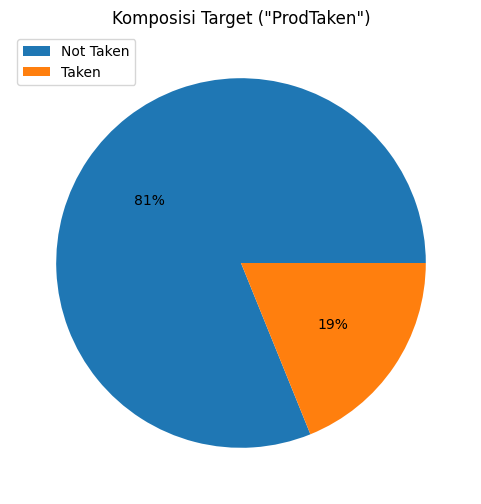

In [42]:
plt.figure(figsize=(6, 6))
plt.pie(y_train.value_counts(), autopct='%1.0f%%')
plt.title('Komposisi Target ("ProdTaken")')
plt.legend(labels=['Not Taken', 'Taken'], loc='upper left')

plt.show()

In [43]:
df_prep.ProdTaken.value_counts(normalize=True)

0    0.808655
1    0.191345
Name: ProdTaken, dtype: float64

Karena adanya imbalace pada target di data training make perlu dilakukan handling imbalance class

### Handling Imbalanced Class Dataset

In [44]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

In [45]:
sm = SMOTE(random_state = 42)
X_train, y_train= sm.fit_resample(X_train, y_train)

In [46]:
y_train.value_counts()

0    2489
1    2489
Name: ProdTaken, dtype: int64

# Modeling

In [47]:
from sklearn.metrics import confusion_matrix
def plotting_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(1, 1, figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', annot_kws={"fontsize":12}, ax=ax)

    # setting title and axis labels
    plt.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)
    ax.set_title('Confusion Matrix ' + title, fontsize=14)
    ax.xaxis.set_ticklabels(['Not Taken', 'Taken'])
    ax.yaxis.set_ticklabels(['Not Taken', 'Taken'])
    plt.show()
def eval_classification(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    # masukin probability
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

## Fit Model

### Random Forest

In [48]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, auc
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.multiclass import unique_labels
from scipy.stats import randint


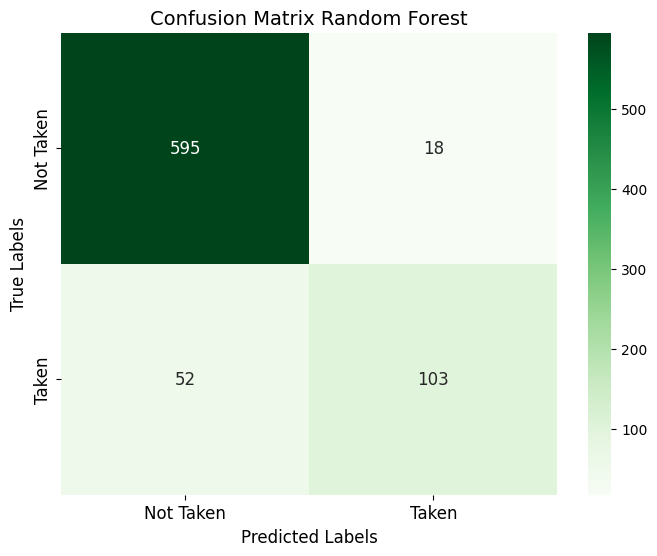

Accuracy (Test Set): 0.91
Precision (Test Set): 0.85
Recall (Test Set): 0.66
F1-Score (Test Set): 0.75
roc_auc (test-proba): 0.95
roc_auc (train-proba): 1.00


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [49]:
model_RF =  RandomForestClassifier(random_state=42)
model_RF.fit(X_train, y_train)

plotting_confusion_matrix(model_RF, X_test, y_test, title='Random Forest')
eval_classification(model_RF, X_train, y_train, X_test, y_test)
model_RF.get_params()

### Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

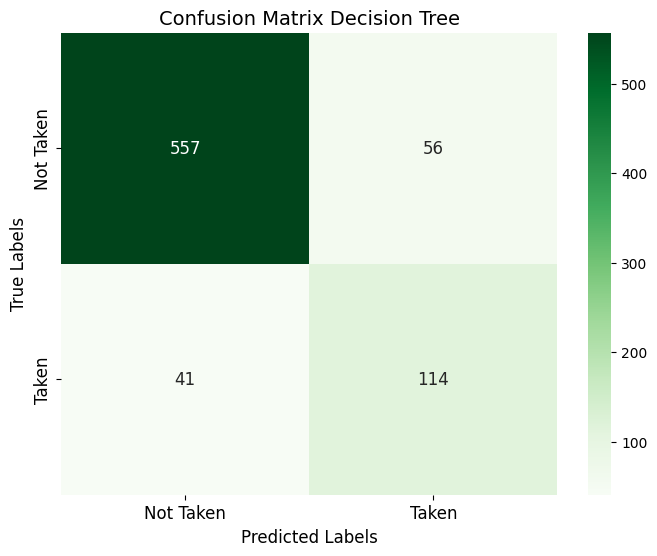

Accuracy (Test Set): 0.87
Precision (Test Set): 0.67
Recall (Test Set): 0.74
F1-Score (Test Set): 0.70
roc_auc (test-proba): 0.82
roc_auc (train-proba): 1.00


<bound method BaseEstimator.get_params of DecisionTreeClassifier(random_state=42)>

In [51]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train, y_train)

plotting_confusion_matrix(model_DT, X_test, y_test, title='Decision Tree')
eval_classification(model_DT, X_train, y_train, X_test, y_test)
model_DT.get_params

### Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

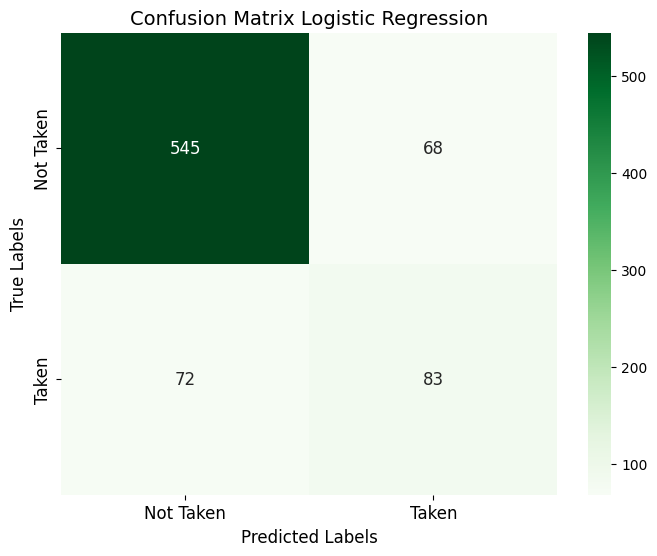

Accuracy (Test Set): 0.82
Precision (Test Set): 0.55
Recall (Test Set): 0.54
F1-Score (Test Set): 0.54
roc_auc (test-proba): 0.81
roc_auc (train-proba): 0.92


<bound method BaseEstimator.get_params of LogisticRegression(random_state=42)>

In [53]:
model_LR = LogisticRegression(random_state=42)
model_LR.fit(X_train, y_train)

plotting_confusion_matrix(model_LR, X_test, y_test, title='Logistic Regression')
eval_classification(model_LR, X_train, y_train, X_test, y_test)
model_LR.get_params

### Ada Boost

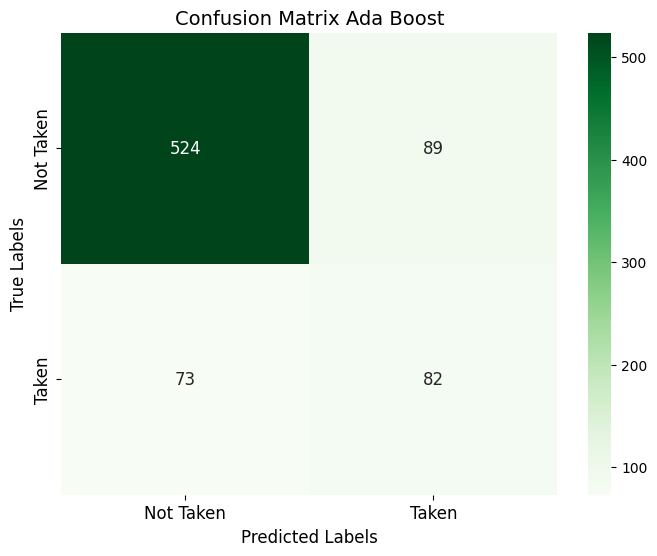

Accuracy (Test Set): 0.79
Precision (Test Set): 0.48
Recall (Test Set): 0.53
F1-Score (Test Set): 0.50
roc_auc (test-proba): 0.77
roc_auc (train-proba): 0.93


<bound method BaseEstimator.get_params of AdaBoostClassifier(random_state=42)>

In [54]:
from sklearn.ensemble import AdaBoostClassifier

model_ADB = AdaBoostClassifier(random_state=42)
model_ADB.fit(X_train, y_train)

plotting_confusion_matrix(model_ADB, X_test, y_test, title='Ada Boost')
eval_classification(model_ADB, X_train, y_train, X_test, y_test)
model_ADB.get_params

### XG Boost

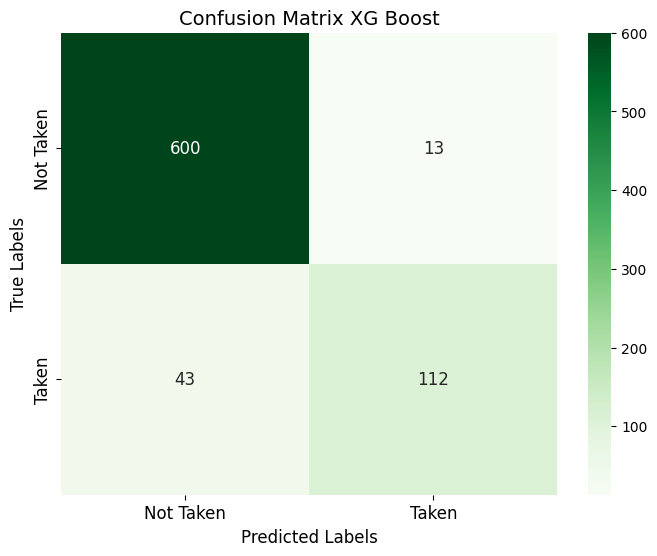

Accuracy (Test Set): 0.93
Precision (Test Set): 0.90
Recall (Test Set): 0.72
F1-Score (Test Set): 0.80
roc_auc (test-proba): 0.97
roc_auc (train-proba): 1.00


<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)>

In [55]:
import xgboost as xgb

# Assuming X_train, X_test, y_train, and y_test are your training and testing data
model_XGB = xgb.XGBClassifier(verbosity=0, random_state=42)
model_XGB.fit(X_train, y_train)

plotting_confusion_matrix(model_XGB, X_test, y_test, title='XG Boost')
eval_classification(model_XGB, X_train, y_train, X_test, y_test)
model_XGB.get_params

In [56]:
def eval(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    auc_test = round(roc_auc_score(y_test, y_pred_proba[:, 1]), 4)
    auc_train = round(roc_auc_score(y_train, y_pred_proba_train[:, 1]), 4)   
    
    return accuracy, precision, recall, f1, auc_test, auc_train

def score_all_classification(model_list, X_train, y_train, X_test, y_test):
    model_name = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'AdaBoost', 'XGBoost', 'Gradien Boosting']
    eval_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC (Test)', 'AUC (Train)']
    
    eval_list = []
    for name, model in zip(model_name, model_list):
        result = eval(model, X_train, y_train, X_test, y_test)
        eval_list.append([name] + list(result))
    df_model = pd.DataFrame(data=eval_list, columns=eval_cols)
    
    return df_model


In [57]:
model_list_base = [model_RF, model_DT, model_LR, model_ADB, model_XGB]

results = score_all_classification(model_list_base, X_train, y_train, X_test, y_test)
results

,Model,Accuracy,Precision,Recall,F1 Score,AUC (Test),AUC (Train)
0,Random Forest,0.9089,0.8512,0.6645,0.7464,0.9499,1.0000
1,Decision Tree,0.8737,0.6706,0.7355,0.7015,0.8221,1.0000
2,Logistic Regression,0.8177,0.5497,0.5355,0.5425,0.8052,0.9203
3,AdaBoost,0.7891,0.4795,0.5290,0.5031,0.7733,0.9297
4,XGBoost,0.9271,0.8960,0.7226,0.8000,0.9651,1.0000


## Tuning Hyperparameter

In [118]:
list_hyperparameters = [
    { # Random Forest
        'n_estimators' : [int(x) for x in np.linspace(50, 1000, 50)], #
        'max_features' : ['sqrt'], #
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)], #
    },    
    { # Decision Tree
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)],
        'min_samples_leaf' : [int(x) for x in np.linspace(1, 10, 5)],
    }, 
    { # Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': [float(x) for x in np.logspace(-3, 3, 20)]
    },
    { # Adaboost
       'n_estimators' : [int(x) for x in np.linspace(100, 2000, 1000)],
       'learning_rate' : [float(x) for x in np.linspace(0.001, 0.1, 100)],
       'algorithm' : ['SAMME', 'SAMME.R']
    },
    { # XGBoost
        'max_depth' : [int(x) for x in np.linspace(10, 50, 10)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 10, 11)],
        'gamma' : [float(x) for x in np.linspace(0, 1, 11)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],
        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, 11)],
        'learning_rate' : [float(x) for x in np.linspace(0, 1, 100)],
        'reg_lambda' : [float(x) for x in np.linspace(0, 1, 11)],
        'reg_alpha' : [float(x) for x in np.linspace(0, 1, 11)]
    }
]

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.best_estimator_.get_params()[key])
        
def eval_after_hyperparameter_tuning(model, X_train, y_train, X_test, y_test):
    eval_new = eval_classification(model, X_train, y_train, X_test, y_test)
    eval_score = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC (Test)', 'AUC (Train)']
    for score, e in zip(eval_score, eval_new):
        print(score + ': ' + str(e))

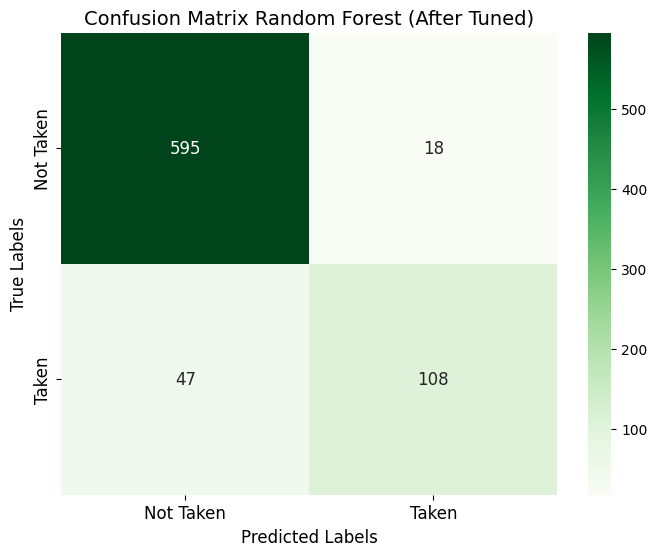

Best n_estimators: 263
Best max_features: sqrt
Best max_depth: 80
Accuracy (Test Set): 0.92
Precision (Test Set): 0.86
Recall (Test Set): 0.70
F1-Score (Test Set): 0.77
roc_auc (test-proba): 0.96
roc_auc (train-proba): 1.00


In [120]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
rf_tuned = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(model_RF, list_hyperparameters[0], cv=5, scoring='f1', random_state=42)
rf_tuned.fit(X_train, y_train)

plotting_confusion_matrix(rf_tuned, X_test, y_test, title='Random Forest (After Tuned)')
show_best_hyperparameter(rf_tuned, list_hyperparameters[0])
eval_classification(rf_tuned, X_train, y_train, X_test, y_test)

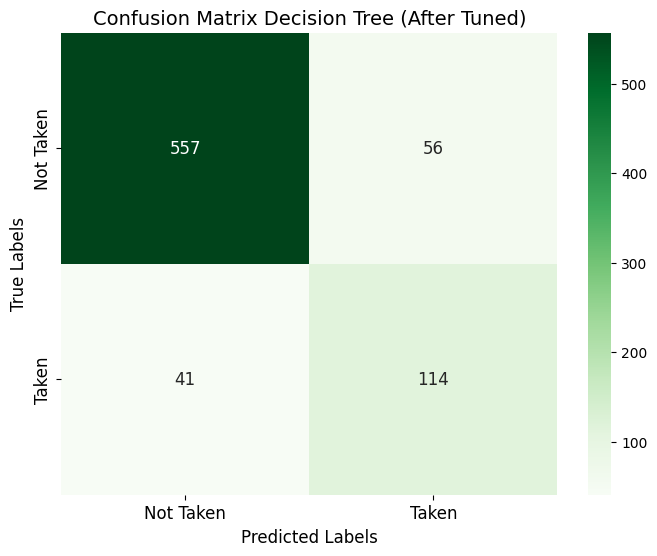

Best max_depth: 70
Best min_samples_leaf: 1
Accuracy (Test Set): 0.87
Precision (Test Set): 0.67
Recall (Test Set): 0.74
F1-Score (Test Set): 0.70
roc_auc (test-proba): 0.82
roc_auc (train-proba): 1.00


In [121]:
dt_tuned = DecisionTreeClassifier(random_state=42)
dt_tuned = RandomizedSearchCV(model_DT, list_hyperparameters[1], cv=5, scoring='f1', random_state=42)
dt_tuned.fit(X_train, y_train)

plotting_confusion_matrix(dt_tuned, X_test, y_test, title='Decision Tree (After Tuned)')
show_best_hyperparameter(dt_tuned, list_hyperparameters[1])
eval_classification(model_DT, X_train, y_train, X_test, y_test)

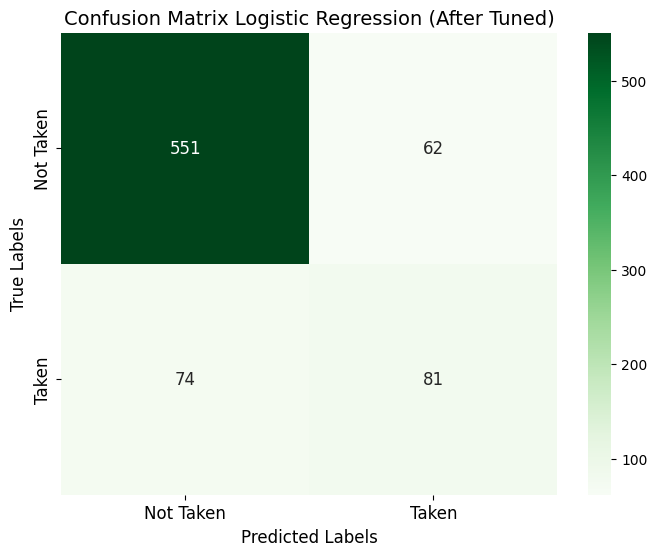

Best penalty: l2
Best C: 1000.0
Accuracy (Test Set): 0.82
Precision (Test Set): 0.55
Recall (Test Set): 0.54
F1-Score (Test Set): 0.54
roc_auc (test-proba): 0.81
roc_auc (train-proba): 0.92


In [122]:
lr_tuned = LogisticRegression(random_state=42)
lr_tuned = RandomizedSearchCV(model_LR, list_hyperparameters[2], cv=5, scoring='f1', random_state=42)
lr_tuned.fit(X_train, y_train)

plotting_confusion_matrix(lr_tuned, X_test, y_test, title='Logistic Regression (After Tuned)')
show_best_hyperparameter(lr_tuned, list_hyperparameters[2])
eval_classification(model_LR, X_train, y_train, X_test, y_test)

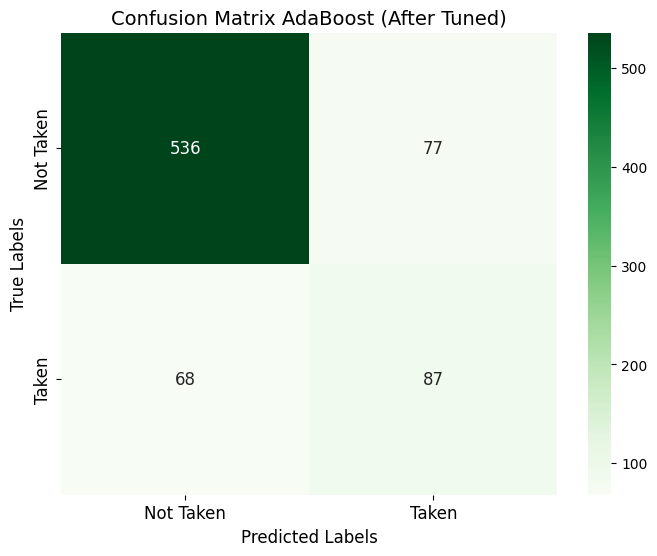

Best n_estimators: 1748
Best learning_rate: 0.047
Best algorithm: SAMME.R
Accuracy (Test Set): 0.79
Precision (Test Set): 0.48
Recall (Test Set): 0.53
F1-Score (Test Set): 0.50
roc_auc (test-proba): 0.77
roc_auc (train-proba): 0.93


In [123]:
adb_tuned = AdaBoostClassifier(random_state=42)
adb_tuned = RandomizedSearchCV(model_ADB, list_hyperparameters[3], cv=5, scoring='f1', random_state=42)
adb_tuned.fit(X_train, y_train)

plotting_confusion_matrix(adb_tuned, X_test, y_test, title='AdaBoost (After Tuned)')
show_best_hyperparameter(adb_tuned, list_hyperparameters[3])
eval_classification(model_ADB, X_train, y_train, X_test, y_test)

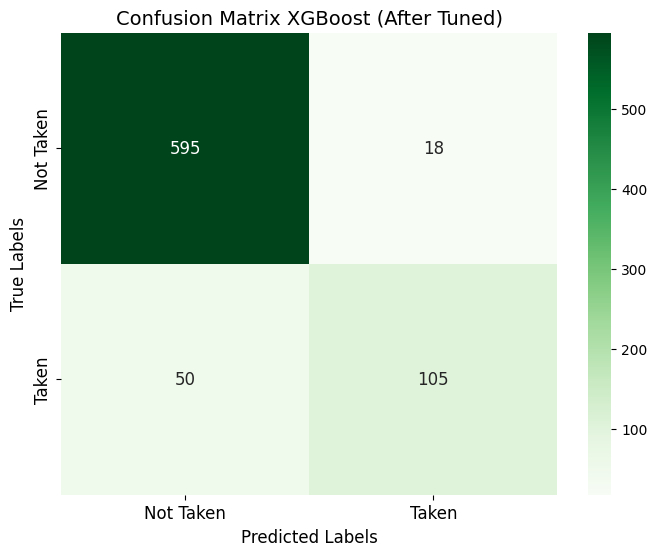

Best max_depth: 50
Best min_child_weight: 2
Best gamma: 0.1
Best tree_method: auto
Best colsample_bytree: 0.6000000000000001
Best learning_rate: 0.5252525252525253
Best reg_lambda: 0.8
Best reg_alpha: 0.8
Accuracy (Test Set): 0.93
Precision (Test Set): 0.90
Recall (Test Set): 0.72
F1-Score (Test Set): 0.80
roc_auc (test-proba): 0.97
roc_auc (train-proba): 1.00


In [124]:
xgb_tuned = xgb.XGBClassifier(random_state=42)
xgb_tuned = RandomizedSearchCV(model_XGB, list_hyperparameters[4], cv=5, scoring='f1', random_state=42)
xgb_tuned.fit(X_train, y_train)

plotting_confusion_matrix(xgb_tuned, X_test, y_test, title='XGBoost (After Tuned)')
show_best_hyperparameter(xgb_tuned, list_hyperparameters[4])
eval_classification(model_XGB, X_train, y_train, X_test, y_test)

In [125]:
# base model
model_list_base = [model_RF, model_DT, model_LR, model_ADB, model_XGB]

results = score_all_classification(model_list_base, X_train, y_train, X_test, y_test)
results

,Model,Accuracy,Precision,Recall,F1 Score,AUC (Test),AUC (Train)
0,Random Forest,0.9089,0.8512,0.6645,0.7464,0.9499,1.0000
1,Decision Tree,0.8737,0.6706,0.7355,0.7015,0.8221,1.0000
2,Logistic Regression,0.8177,0.5497,0.5355,0.5425,0.8052,0.9203
3,AdaBoost,0.7891,0.4795,0.5290,0.5031,0.7733,0.9297
4,XGBoost,0.9271,0.8960,0.7226,0.8000,0.9651,1.0000


In [126]:
model_tuning = [rf_tuned, dt_tuned, lr_tuned,  adb_tuned, xgb_tuned]
score_all_classification(model_tuning, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,AUC (Test),AUC (Train)
0,Random Forest,0.9154,0.8571,0.6968,0.7687,0.9582,1.0000
1,Decision Tree,0.8737,0.6706,0.7355,0.7015,0.8221,1.0000
2,Logistic Regression,0.8229,0.5664,0.5226,0.5436,0.8071,0.9217
3,AdaBoost,0.8112,0.5305,0.5613,0.5455,0.8062,0.9346
4,XGBoost,0.9115,0.8537,0.6774,0.7554,0.9520,1.0000


# Feature Importance Analysis

In [127]:
def show_feature_importance(model, title):
    if type(model).__name__ == 'LogisticRegression':
        feat_importances = pd.Series(model.coef_[0], index=X.columns)
    else:
        feat_importances = pd.Series(model.feature_importances_, index=X.columns)
        
    ax = feat_importances.sort_values(ascending=False).plot(kind='barh', figsize=(10, 8), color='orange')
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Features')
    plt.title('Feature Importance ' + title)

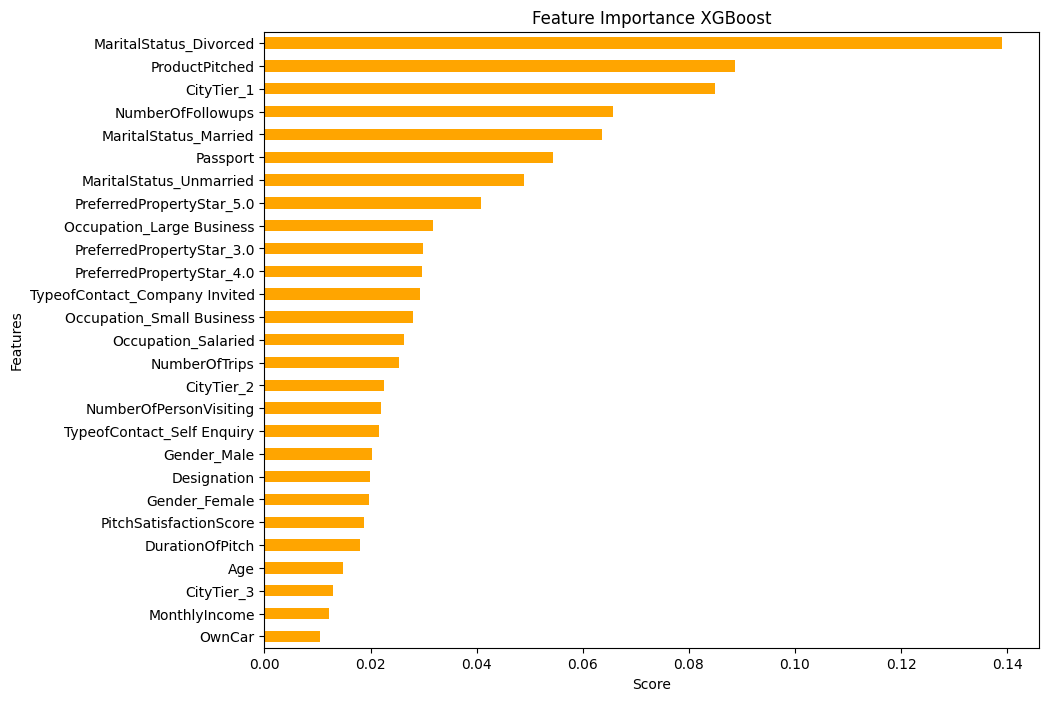

In [128]:
# XGBoost
show_feature_importance(model_XGB, title='XGBoost')

## Feature Selection

Dari hasil feature importance kelima model tersebut, hanya akan dipilih berdasarkan 2 model terbaik yaitu Random Forest dan XGBoost dimana dari gabungan keduanya akan dipilih 20 fitur dari semua fitur yang ada yang akan coba dimodelkan ulang.

In [129]:
# selecting feature by feature importance from model Random Forest and XGBoost
feature_rf = pd.Series(model_RF.feature_importances_, index=X.columns).nlargest(20).index.tolist()
feature_xgb = pd.Series(model_XGB.feature_importances_, index=X.columns).nlargest(20).index.tolist()

selected_cols = [col for col in feature_rf]
for col in feature_xgb:
    if col not in selected_cols:
        selected_cols.append(col)
        
selected_cols

['Age',
 'DurationOfPitch',
 'MonthlyIncome',
 'NumberOfFollowups',
 'NumberOfTrips',
 'ProductPitched',
 'Passport',
 'MaritalStatus_Married',
 'PitchSatisfactionScore',
 'MaritalStatus_Divorced',
 'CityTier_1',
 'Designation',
 'NumberOfPersonVisiting',
 'PreferredPropertyStar_3.0',
 'MaritalStatus_Unmarried',
 'TypeofContact_Self Enquiry',
 'Gender_Female',
 'Occupation_Salaried',
 'Occupation_Small Business',
 'OwnCar',
 'PreferredPropertyStar_5.0',
 'Occupation_Large Business',
 'PreferredPropertyStar_4.0',
 'TypeofContact_Company Invited',
 'CityTier_2',
 'Gender_Male']

# Data Modelling #2

Pada modelling ini akan digunakan kolom berdasarkan feature importance sebelumnya dimana hasilnya kurang lebih sama dengan hasil feature selection saat preprocessing sebelumnya.

In [130]:
# create train and test set using selected feature
X_train2 = X_train[selected_cols]
y_train2 = y_train.copy()
X_test2 = X_test[selected_cols]
y_test2 = y_test.copy()

## Model Selection

### 1. Logistic Regression

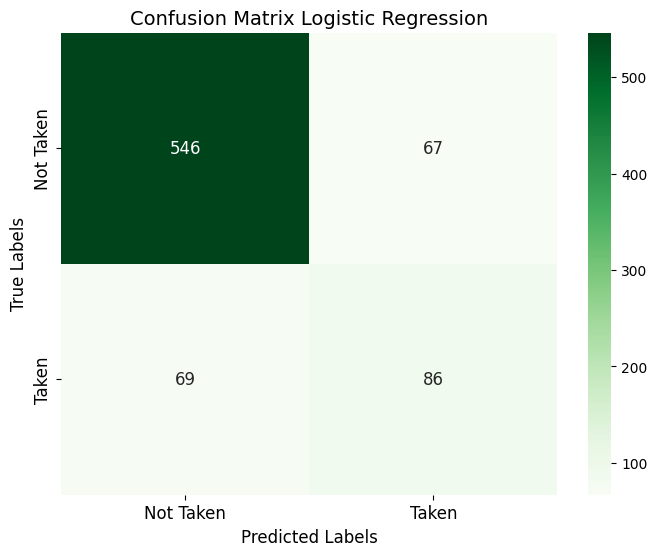

Accuracy (Test Set): 0.82
Precision (Test Set): 0.56
Recall (Test Set): 0.55
F1-Score (Test Set): 0.56
roc_auc (test-proba): 0.80
roc_auc (train-proba): 0.92


In [131]:
model_lr2 = LogisticRegression(random_state=42)
model_lr2.fit(X_train2, y_train2)

plotting_confusion_matrix(model_lr2, X_test2, y_test2, title='Logistic Regression')
eval_classification(model_lr2, X_train2, y_train2, X_test2, y_test2)

### 2. Decision Tree

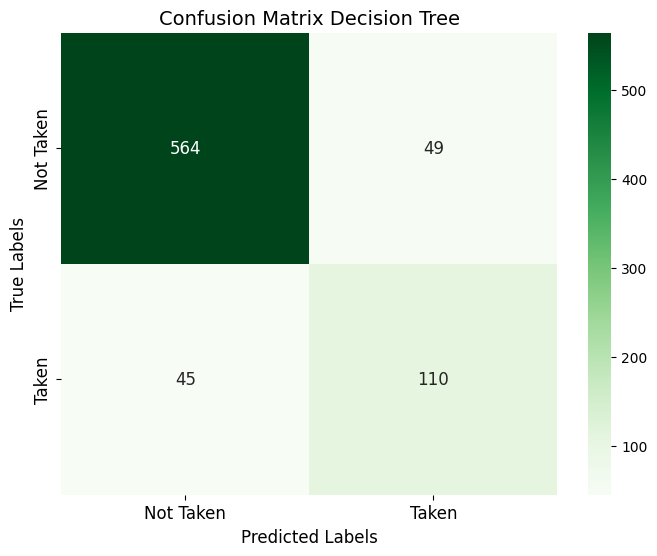

Accuracy (Test Set): 0.88
Precision (Test Set): 0.69
Recall (Test Set): 0.71
F1-Score (Test Set): 0.70
roc_auc (test-proba): 0.81
roc_auc (train-proba): 1.00


In [132]:
model_dt2 = DecisionTreeClassifier(random_state=42)
model_dt2.fit(X_train2, y_train2)

plotting_confusion_matrix(model_dt2, X_test2, y_test2, title='Decision Tree')
eval_classification(model_dt2, X_train2, y_train2, X_test2, y_test2)

### 3. Random Forest

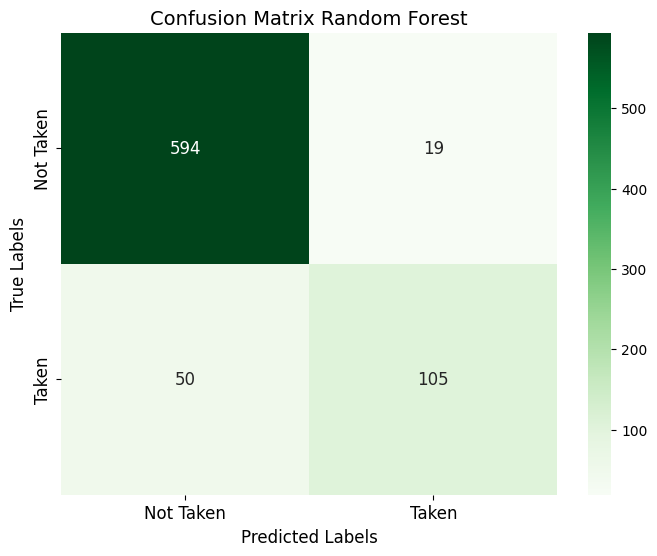

Accuracy (Test Set): 0.91
Precision (Test Set): 0.85
Recall (Test Set): 0.68
F1-Score (Test Set): 0.75
roc_auc (test-proba): 0.95
roc_auc (train-proba): 1.00


In [133]:
model_rf2 = RandomForestClassifier(random_state=42)
model_rf2.fit(X_train2, y_train2)

plotting_confusion_matrix(model_rf2, X_test2, y_test2, title='Random Forest')
eval_classification(model_rf2, X_train2, y_train2, X_test2, y_test2)

### 4. AdaBoost

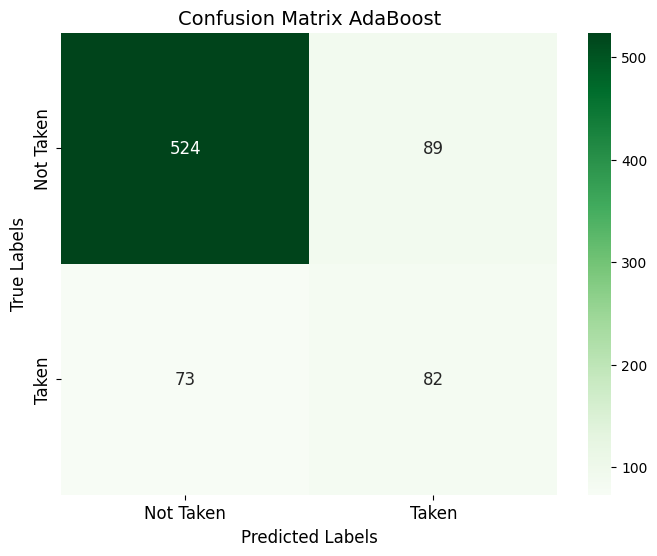

Accuracy (Test Set): 0.79
Precision (Test Set): 0.48
Recall (Test Set): 0.53
F1-Score (Test Set): 0.50
roc_auc (test-proba): 0.77
roc_auc (train-proba): 0.93


In [134]:
model_adb2 = AdaBoostClassifier(random_state=42)
model_adb2.fit(X_train2, y_train2)

plotting_confusion_matrix(model_adb2, X_test2, y_test2, title='AdaBoost')
eval_classification(model_adb2, X_train2, y_train2, X_test2, y_test2)

### 5. XGBoost

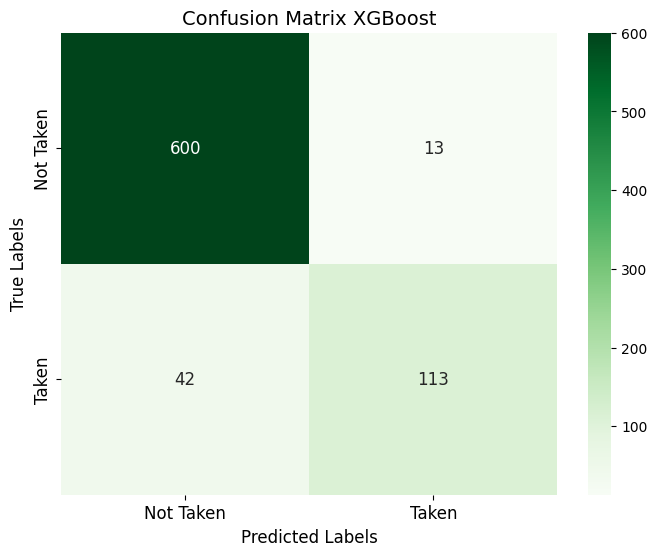

Accuracy (Test Set): 0.93
Precision (Test Set): 0.90
Recall (Test Set): 0.73
F1-Score (Test Set): 0.80
roc_auc (test-proba): 0.96
roc_auc (train-proba): 1.00


In [135]:
model_xgb2 = XGBClassifier(verbosity=0, random_state=42)
model_xgb2.fit(X_train2, y_train2)

plotting_confusion_matrix(model_xgb2, X_test2, y_test2, title='XGBoost')
eval_classification(model_xgb2, X_train2, y_train2, X_test2, y_test2)

## Model Evaluation

In [136]:
model_list_base = [model_RF, model_DT, model_LR, model_ADB, model_XGB]

results = score_all_classification(model_list_base, X_train, y_train, X_test, y_test)
results

,Model,Accuracy,Precision,Recall,F1 Score,AUC (Test),AUC (Train)
0,Random Forest,0.9089,0.8512,0.6645,0.7464,0.9499,1.0000
1,Decision Tree,0.8737,0.6706,0.7355,0.7015,0.8221,1.0000
2,Logistic Regression,0.8177,0.5497,0.5355,0.5425,0.8052,0.9203
3,AdaBoost,0.7891,0.4795,0.5290,0.5031,0.7733,0.9297
4,XGBoost,0.9271,0.8960,0.7226,0.8000,0.9651,1.0000


In [141]:
model_tuning = [rf_tuned, dt_tuned, lr_tuned,  adb_tuned, xgb_tuned]
score_all_classification(model_tuning, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,AUC (Test),AUC (Train)
0,Random Forest,0.9154,0.8571,0.6968,0.7687,0.9582,1.0000
1,Decision Tree,0.8737,0.6706,0.7355,0.7015,0.8221,1.0000
2,Logistic Regression,0.8229,0.5664,0.5226,0.5436,0.8071,0.9217
3,AdaBoost,0.8112,0.5305,0.5613,0.5455,0.8062,0.9346
4,XGBoost,0.9115,0.8537,0.6774,0.7554,0.9520,1.0000


In [137]:
# scoring base model
model_list_base2 = [model_lr2, model_dt2, model_rf2, model_adb2, model_xgb2]
score_all_classification(model_list_base2, X_train2, y_train2, X_test2, y_test2)

,Model,Accuracy,Precision,Recall,F1 Score,AUC (Test),AUC (Train)
0,Random Forest,0.8229,0.5621,0.5548,0.5584,0.8047,0.9178
1,Decision Tree,0.8776,0.6918,0.7097,0.7006,0.8149,1.0000
2,Logistic Regression,0.9102,0.8468,0.6774,0.7527,0.9545,1.0000
3,AdaBoost,0.7891,0.4795,0.5290,0.5031,0.7733,0.9297
4,XGBoost,0.9284,0.8968,0.7290,0.8043,0.9562,1.0000


### Model Validation

In [138]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=5)
score=cross_val_score(model_xgb2,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.97265625 0.96088657 0.94915254 0.92568449 0.94393742]
Average Cross Validation score :0.9504634533898304


# Feature Importance

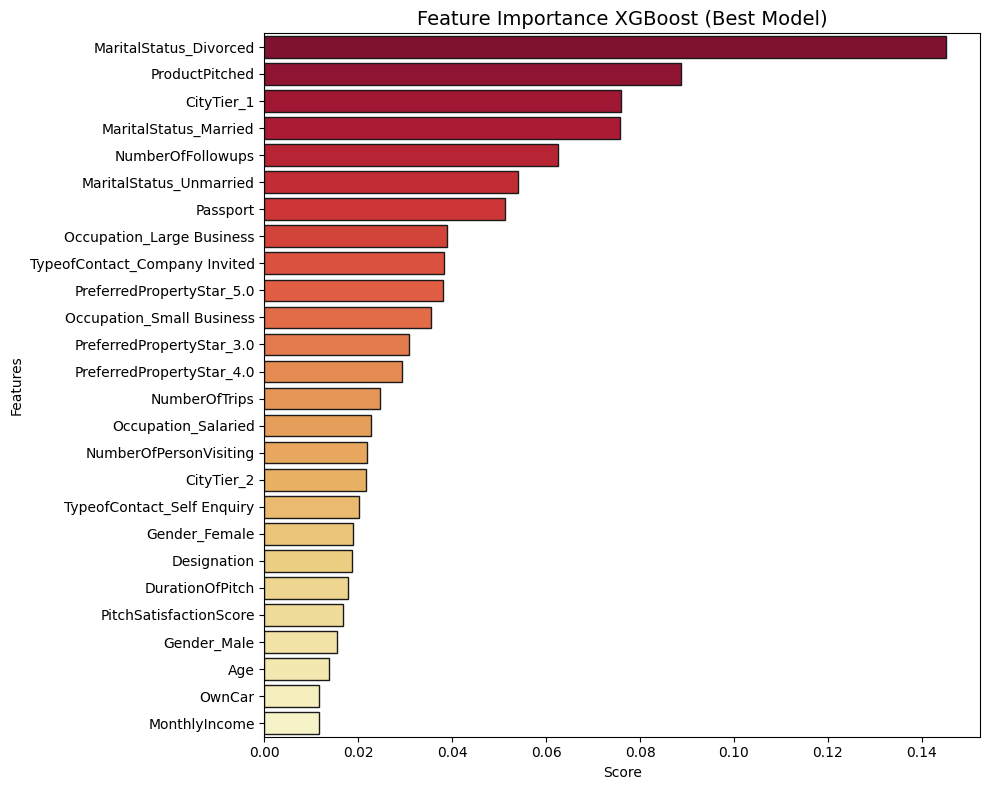

In [139]:
feature_importance_xgb = pd.Series(model_xgb2.feature_importances_, index=X[selected_cols].columns)
df_feature = feature_importance_xgb.sort_values(ascending=False).to_frame(name='Score').reset_index()

plt.figure(figsize=(10,8))
sns.barplot(data=df_feature, y='index', x='Score', palette='YlOrRd_r', edgecolor='.1')
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Feature Importance XGBoost (Best Model)', fontsize=14)
plt.tight_layout()
plt.show()

Berdasarkan Feature Importance XGBoost diatas didatapakan Top 5 Features yang paling penting adalah 'MaritalStatus', 'ProductPitched', 'CityTier', 'NumerOfFollowups', dan 'Passport'

## Business insights

In [173]:
best_model = model_xgb2
pred_test = best_model.predict(X_test2)
pred_train = best_model.predict(X_train2)
df_pred_test = pd.DataFrame({'ProdTaken':y_test2, 'ProdTaken_Pred':pred_test}, index=y_test2.index.copy())
df_pred_train = pd.DataFrame({'ProdTaken':y_train2, 'ProdTaken_Pred':pred_train}, index=y_train2.index.copy())

# combine prediction labels into features column on clean data
df_test = df_clean[df_prep.index.isin(df_pred_test.index)]
df_train = df_clean[df_prep.index.isin(df_pred_train.index)]
df_final_test = pd.concat([df_test.drop('ProdTaken', axis=1), df_pred_test], axis=1)
df_final_train = pd.concat([df_train.drop('ProdTaken', axis=1), df_pred_train], axis=1)
df_final_all = df_final_train.append(df_final_test).reset_index()
df_final_all.head()

,index,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,ProdTaken,ProdTaken_Pred
0,0,41.0,Self Enquiry,3.0,6.0,Salaried,Female,3.0,3.0,Deluxe,3.0,Unmarried,1.0,1.0,2.0,1.0,Manager,20993.0,0,0
1,1,49.0,Company Invited,1.0,14.0,Salaried,Male,3.0,4.0,Deluxe,4.0,Divorced,2.0,0.0,3.0,1.0,Manager,20130.0,1,1
2,3,33.0,Company Invited,1.0,9.0,Salaried,Female,2.0,3.0,Basic,3.0,Divorced,2.0,1.0,5.0,1.0,Executive,17909.0,0,0
3,5,32.0,Company Invited,1.0,8.0,Salaried,Male,3.0,3.0,Basic,3.0,Unmarried,1.0,0.0,5.0,1.0,Executive,18068.0,0,0
4,6,59.0,Self Enquiry,1.0,9.0,Small Business,Female,2.0,2.0,Basic,5.0,Divorced,5.0,1.0,2.0,1.0,Executive,17670.0,0,0


### Customer dengan Marital Status apa yang lebih cenderung membeli paket liburan?

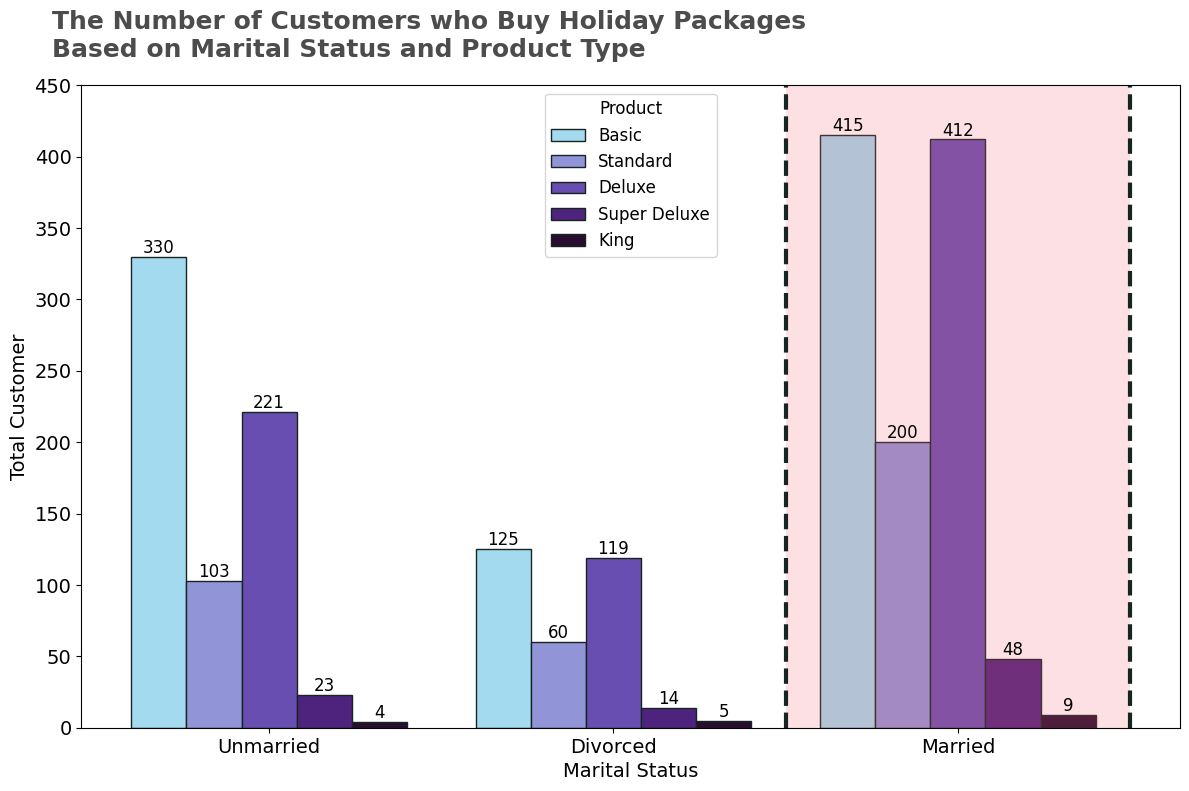

In [231]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
product_labs = ['Basic', 'Standard', 'Deluxe', 'Super Deluxe', 'King']
product_palettes = ['#97DFFC', '#858AE3', '#613DC1', '#4E148C', '#2C0735']
ax = sns.countplot(data=df_final_all[df_final_all['ProdTaken']==1], x='MaritalStatus', hue='ProductPitched',
                   order=['Unmarried', 'Divorced', 'Married'], hue_order=product_labs,
                   palette=product_palettes, edgecolor='#162521')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Marital Status', fontsize=14)
ax.set_ylabel('Total Customer', fontsize=14)
ax.set_ylim(0, 450)
   
plt.stackplot(np.arange(1.5, 3.5, 1), [[450]], colors='#F56476', alpha=0.2)
plt.axvline(x=1.5, color='#162521', linestyle='--', linewidth=3) 
plt.axvline(x=2.5, color='#162521', linestyle='--', linewidth=3)


for container in ax.containers:
    ax.bar_label(container, size=12)
ax.legend(fontsize=12, title_fontsize=12, title='Product', loc='upper center')
ax.text(s="The Number of Customers who Buy Holiday Packages\nBased on Marital Status and Product Type", 
        x=-0.63, y=470, fontsize=18, fontweight='bold', alpha =.7)
plt.tight_layout()
plt.show()

### Berapa lama Product Pitched yang perlu dilakukan supaya customer mau mengambil product berdasarkan segmentasi umur

In [186]:
def get_age_group(x):
    if x <= 25:
        return 'Remaja'
    elif x <= 45:
        return 'Dewasa'
    else:
        return 'Lansia'
    
df_final_all['AgeGroup'] = df_final_all['Age'].apply(lambda x : get_age_group(x))
df_product_age = pd.crosstab(df_final_all['AgeGroup'], df_final_all['ProdTaken'], normalize='index')*100
df_product_age = df_product_age.stack().reset_index(name='Percentage')
df_product_age

,AgeGroup,ProdTaken,Percentage
0,Dewasa,0,55.160142
1,Dewasa,1,44.839858
2,Lansia,0,52.482622
3,Lansia,1,47.517378
4,Remaja,0,51.388889
5,Remaja,1,48.611111


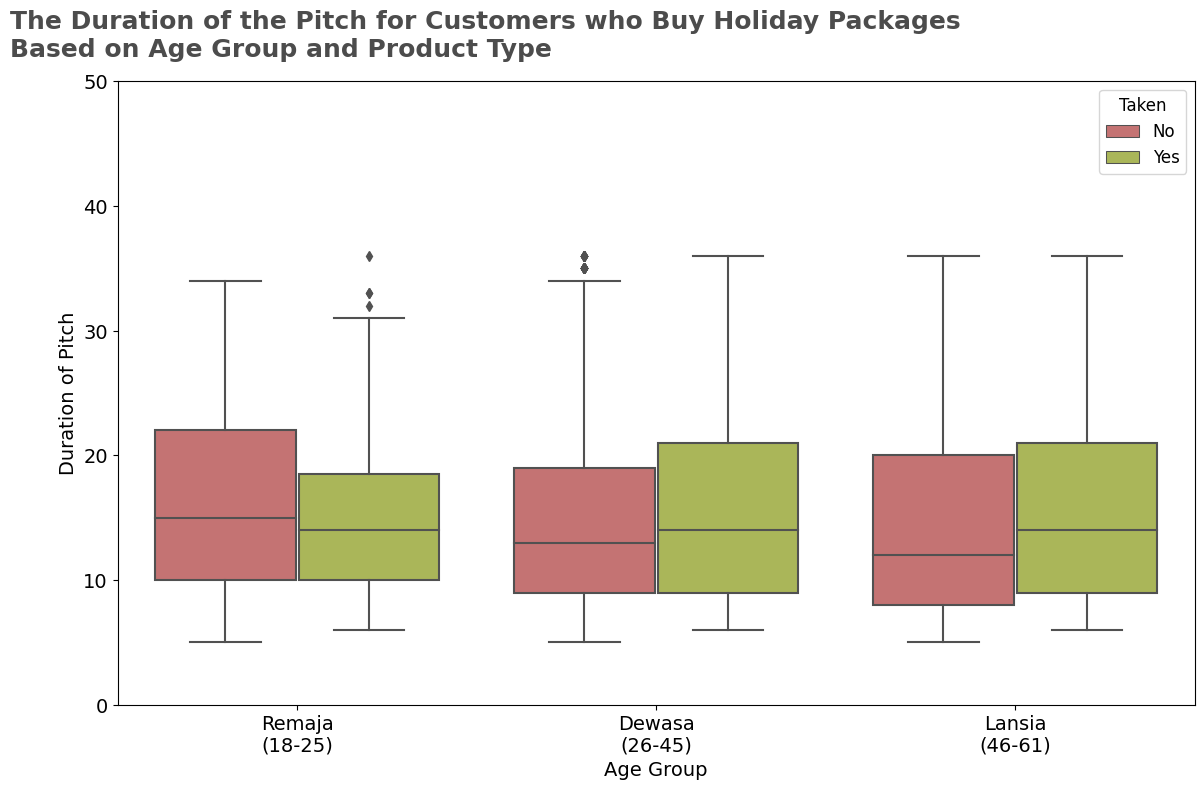

In [188]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.boxplot(data=df_final_all, x='AgeGroup', y='DurationOfPitch', hue='ProdTaken',
                 order=['Remaja', 'Dewasa', 'Lansia'], palette=['#D16666', '#B6C649'])

ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Duration of Pitch', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)

age_labs = []
for x in ['Remaja', 'Dewasa', 'Lansia']:
    minimum = int(df_final_all[df_final_all['AgeGroup']==x]['Age'].min())
    maksimum = int(df_final_all[df_final_all['AgeGroup']==x]['Age'].max())
    age_labs.append('('+str(minimum)+'-'+str(maksimum)+')')
ax.set_xticklabels([x.get_text()+'\n'+lab for x, lab in zip(ax.get_xticklabels(), age_labs)])
ax.set_ylim(0, 50)

# plt.stackplot(np.arange(-0.5, 1.5 ,1), [[50]], colors='#568EA3', alpha=0.2)
# plt.axvline(x=-0.5, color='#000022', linestyle='--', linewidth=3)
# plt.axvline(x=0.5, color='#000022', linestyle='--', linewidth=3) 

legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['No', 'Yes'],
          fontsize=12, title_fontsize=12, title='Taken')

ax.text(s='The Duration of the Pitch for Customers who Buy Holiday Packages\nBased on Age Group and Product Type', 
        x=-0.8, y=52, fontsize=18, fontweight='bold', alpha =.7)
plt.tight_layout()
plt.show()

pada segmentasi remaja lakukan penawaran dengan durasi yang lebih sebentar, sedangkan untuk segmentasi dewasa dan lansia lakukan dengan durasi yang lebih lama

### Bagaimana distribusi pembelian paket liburan berdasarkan City Tier pada masing-masing jenis produk?

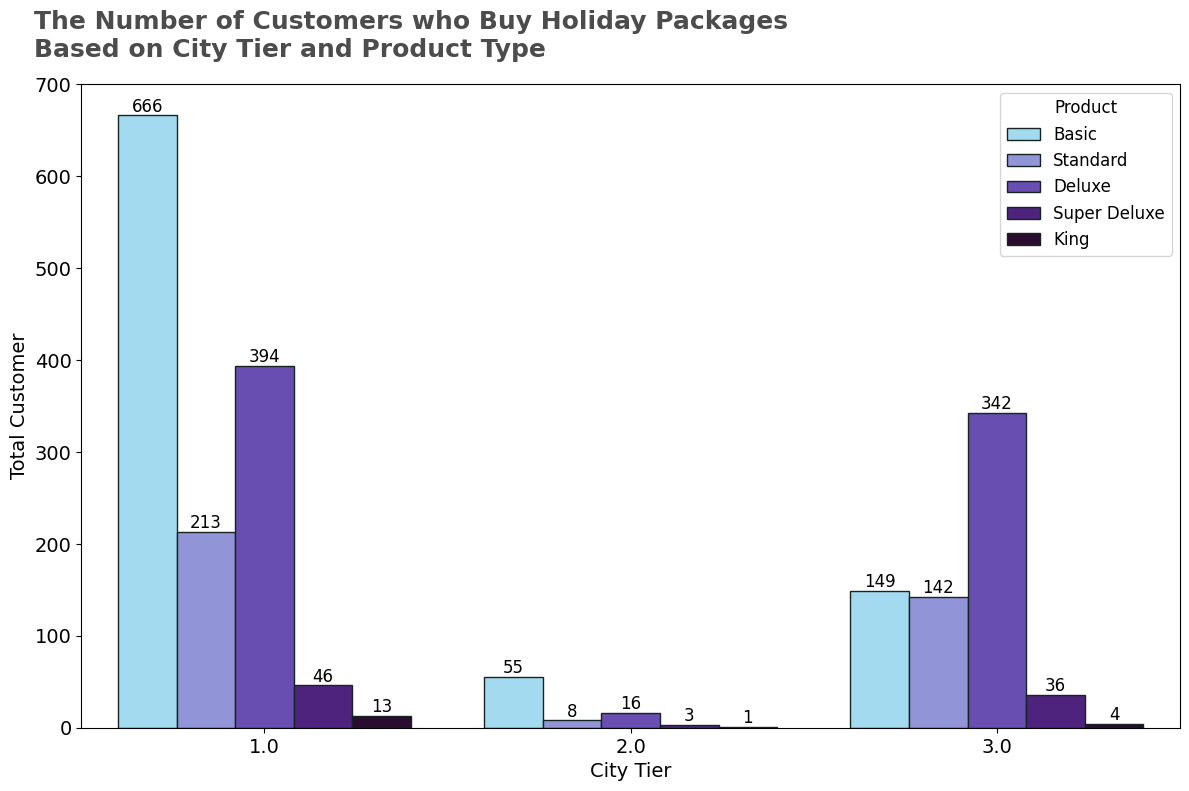

In [206]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
product_labs = ['Basic', 'Standard', 'Deluxe', 'Super Deluxe', 'King']
product_palettes = ['#97DFFC', '#858AE3', '#613DC1', '#4E148C', '#2C0735']
ax = sns.countplot(data=df_final_all[df_final_all['ProdTaken']==1], x='CityTier', hue='ProductPitched',
                    hue_order=product_labs,
                   palette=product_palettes, edgecolor='#162521')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('City Tier', fontsize=14)
ax.set_ylabel('Total Customer', fontsize=14)
ax.set_ylim(0, 700)
   
# plt.stackplot(np.arange(0.5, 2., 1), [[400]], colors='#F56476', alpha=0.2)
# plt.axvline(x=0.5, color='#162521', linestyle='--', linewidth=3)
# plt.axvline(x=1.5, color='#162521', linestyle='--', linewidth=3) 

for container in ax.containers:
    ax.bar_label(container, size=12)
ax.legend(fontsize=12, title_fontsize=12, title='Product', loc='upper right')
ax.text(s="The Number of Customers who Buy Holiday Packages\nBased on City Tier and Product Type", 
        x=-0.63, y=730, fontsize=18, fontweight='bold', alpha =.7)
plt.tight_layout()
plt.show()

Untuk mengefensiensikan penawaran produk dapat dilakukan kepada kota dengan tier 1 atau 3

### Berapa banyak Numer Of Followups yang perlu dilakukan sehingga customers mau membeli produk berdasarkan jenis produknya

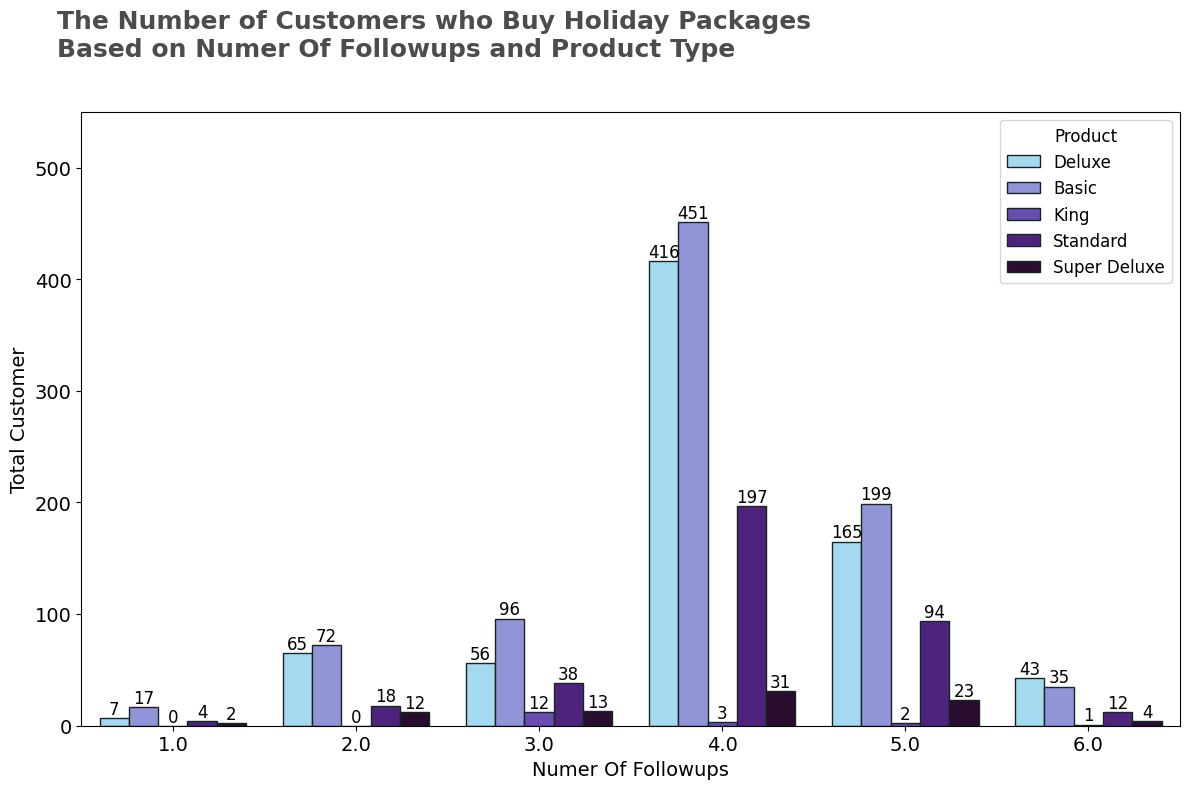

In [205]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
product_palettes = ['#97DFFC', '#858AE3', '#613DC1', '#4E148C', '#2C0735']
ax = sns.countplot(data=df_final_all[df_final_all['ProdTaken']==1], x='NumberOfFollowups', hue='ProductPitched',
                   palette=product_palettes, edgecolor='#162521')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Numer Of Followups', fontsize=14)
ax.set_ylabel('Total Customer', fontsize=14)
ax.set_ylim(0, 550)
   
# plt.stackplot(np.arange(0.5, 2., 1), [[400]], colors='#F56476', alpha=0.2)
# plt.axvline(x=0.5, color='#162521', linestyle='--', linewidth=3)
# plt.axvline(x=1.5, color='#162521', linestyle='--', linewidth=3) 

for container in ax.containers:
    ax.bar_label(container, size=12)
ax.legend(fontsize=12, title_fontsize=12, title='Product', loc='upper right')
ax.text(s="The Number of Customers who Buy Holiday Packages\nBased on Numer Of Followups and Product Type", 
        x=-0.63, y=600, fontsize=18, fontweight='bold', alpha =.7)
plt.tight_layout()
plt.show()

Untuk mendapatkan customers setidaknya lakukan minimal 4 kali follow up terkait penawaran produk

### Bagaimana distribusi dari pembelian paket liburan yang diambil customer berdasarkan kepemilikan passport dan product type

In [207]:
df_product_taken = df_final_all[df_final_all['ProdTaken']==1]
df_product_passport = pd.crosstab(df_product_taken['ProductPitched'], df_product_taken['Passport'], normalize='index')*100
df_product_passport = df_product_passport.stack().reset_index(name='Percentage')
df_product_passport

,ProductPitched,Passport,Percentage
0,Basic,0.0,65.632184
1,Basic,1.0,34.367816
2,Deluxe,0.0,70.744681
3,Deluxe,1.0,29.255319
4,King,0.0,72.222222
5,King,1.0,27.777778
6,Standard,0.0,69.972452
7,Standard,1.0,30.027548
8,Super Deluxe,0.0,57.647059
9,Super Deluxe,1.0,42.352941


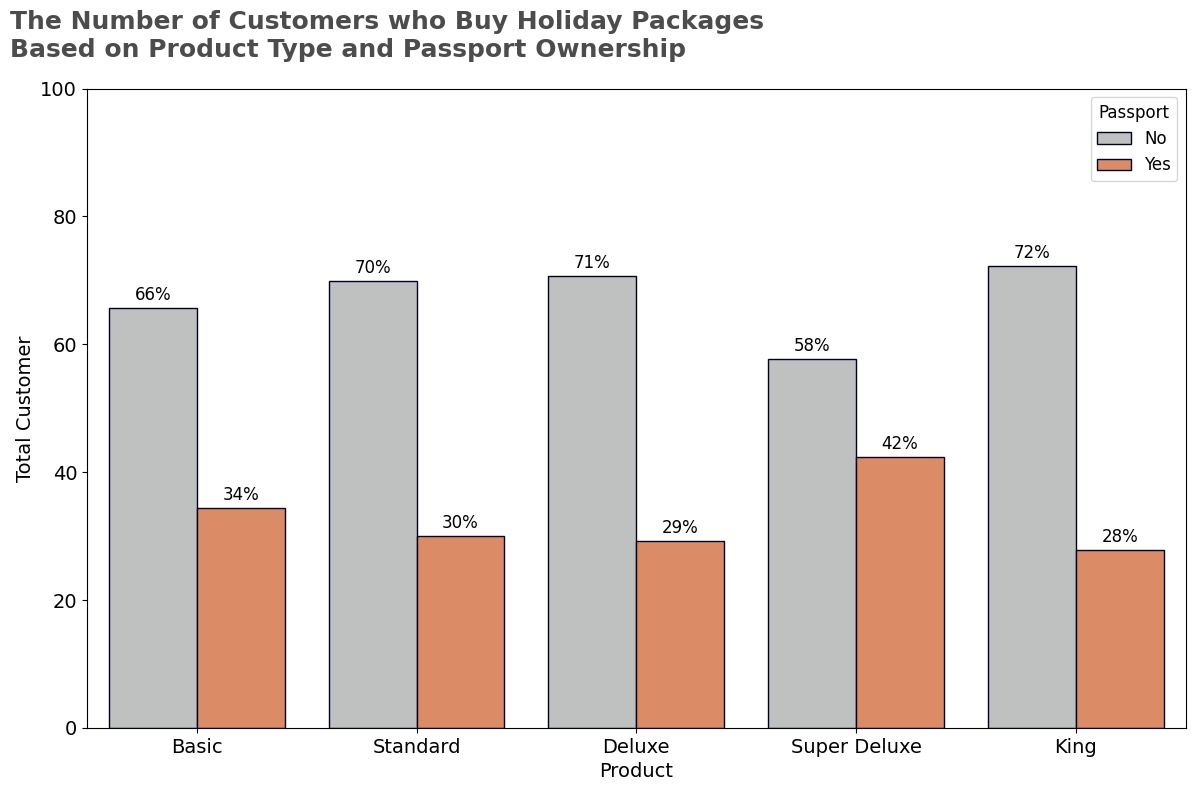

In [209]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
product_labs = ['Basic', 'Standard', 'Deluxe', 'Super Deluxe', 'King']
ax = sns.barplot(data=df_product_passport, x='ProductPitched', y='Percentage', hue='Passport',
              order=product_labs, palette=['#BFC0C0', '#EF8354'], edgecolor='#000022')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Product', fontsize=14)
ax.set_ylabel('Total Customer', fontsize=14)
ax.set_ylim(0, 100)
   
# plt.stackplot(np.arange(0.5, 2., 1), [[100]], colors='#04724D', alpha=0.2)
# plt.axvline(x=0.5, color='#000022', linestyle='--', linewidth=3)
# plt.axvline(x=1.5, color='#000022', linestyle='--', linewidth=3) 

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', size=12, padding=3)

legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['No', 'Yes'], fontsize=12, title_fontsize=12, title='Passport')
ax.text(s="The Number of Customers who Buy Holiday Packages\nBased on Product Type and Passport Ownership", 
        x=-0.85, y=105, fontsize=18, fontweight='bold', alpha =.7)
plt.tight_layout()
plt.show()

Action yang perlu dilakukan adalah untuk lebih mengutamakan penawaran kepada customer yang belum memiliki passport

## Business Impact

In [210]:
# count number of total customer
total_customer_before = len(df_final_test['ProdTaken'])
total_customer_after = len(df_final_test[df_final_test['ProdTaken_Pred']==1])

# count number of targeted customer
targeted_customer_before = len(df_final_test[df_final_test['ProdTaken']==1]) 
targeted_customer_after = len(df_final_test[(df_final_test['ProdTaken']==1)
                                            & (df_final_test['ProdTaken_Pred']==1)])

# calculate conversion rate
cvr_before = round(targeted_customer_before/total_customer_before * 100, 1)
cvr_after = round(targeted_customer_after/total_customer_after * 100, 1)

In [211]:
# view conversion rate before and after using model
df_conversion = pd.DataFrame([[total_customer_before, total_customer_after],
                              [targeted_customer_before, targeted_customer_after],
                              [cvr_before, cvr_after]],
                             columns=['Before Using Model', 'After Using Model'],
                             index=['Total Customer', 'Targeted Customer', 'Conversion Rate'])
df_conversion

,Before Using Model,After Using Model
Total Customer,768.0,126.0
Targeted Customer,155.0,113.0
Conversion Rate,20.2,89.7


### Marketing Cost

Call Centers in the USA "generally" price themselves at $23-28 an hour with the average being around $26.00.

In [220]:
# define cost in minutes
cost_per_minute = 26/60

# calculate marketing cost
duration_before = round(df_final_test['DurationOfPitch'].sum(),2)
duration_after = round(df_final_test[df_final_test['ProdTaken_Pred']==1]['DurationOfPitch'].sum(),2)
cost_before = round(duration_before * cost_per_minute,2)
cost_after = round(duration_after * cost_per_minute,2)
saving_cost = round(cost_before - cost_after,2)
saving_cost_perc = round(saving_cost/cost_before * 100, 2)

In [221]:
df_cost = pd.DataFrame([[targeted_customer_before, targeted_customer_after], [cost_before, cost_before],
                        [cost_before, cost_after], [0, saving_cost], [0, saving_cost_perc]],
                       index=['Targeted Customer', 'All Cost', 'Spending Cost', 'Saving Cost', '% Saving Cost'],
                       columns=['Before Using Model', 'After Using Model'])
df_cost

,Before Using Model,After Using Model
Targeted Customer,155.0,113.00
All Cost,5055.7,5055.70
Spending Cost,5055.7,887.03
Saving Cost,0.0,4168.67
% Saving Cost,0.0,82.45
